<a href="https://colab.research.google.com/github/KimSungWoon/ML-DL-Study/blob/main/%E1%84%80%E1%85%B5%E1%86%B7%E1%84%89%E1%85%A5%E1%86%BC%E1%84%8B%E1%85%AE%E1%86%AB_%E1%84%90%E1%85%A1%E1%84%8B%E1%85%B5%E1%84%90%E1%85%A1%E1%84%82%E1%85%B5%E1%86%A8_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 타이타닉 가설
1. 남자가 많이 죽었다. (채택)
2. *가정이 있는 남자가 많이 죽음. (채택)
3. 3클래스에 탄사람이 많이 죽었다 (채택)
4. 3클래스에 탄 남자가 압도적으로 많이죽음(채택)
4. 가족 없는 남자가 많이 죽었을 것이다.(채택)
5. S에서 탄 사람이 많이 죽었다. / *s의 특징? (채택)
6. 요금을 적게 낼수록 더 많이 죽었다 (채택)
7. 나이가 어릴수록 저 많이 죽었다.(채택)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
# train data Load & shpae 확인
titanic_df = pd.read_csv('/content/sample_data/train.csv', sep=',')

print(titanic_df.shape)
titanic_df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
def pie_chart(feature):
  feature_ratio = titanic[feature].value_counts()
  feature_size = feature_ratio.size
  feature_index = feature_ratio.index
  survived = titanic[titanic.Survived == 1][feature].value_counts()
  dead = titanic[titanic.Survived == 0][feature].value_counts()

  plt.plot(aspect='auto')
  plt.pie(feature_ratio, labels=feature_index, autopct='%1.1f%%')
  plt.show()

  for i, index in enumerate(feature_index):
    plt.subplot(1, feature_size + 1, i+1, aspect='equal')
    plt.pie([survived[index], dead[index]], labels=['Survived', 'Dead'], autopct='%1.1f%%')

  plt.show()

## 1.성별에 따른 생존 비율
  
  - 팩트) 남자가 여자보다 많이 죽고 여자는 많이 살았다.<시각화 체크>

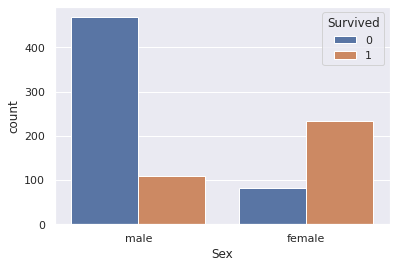

In [ ]:
# 성별에 따른 생존 비율
sns.countplot(data=titanic_df, x='Sex', hue='Survived')
plt.show()

## 2.가족있는 남자와 없는 남자의 생존률은 다를 것이다. 
 1) 결혼한 남자와 안한 남자의 성을 분석 
 - 결혼 한남자가 존나게 뒤졌다 <시각화 체크 >



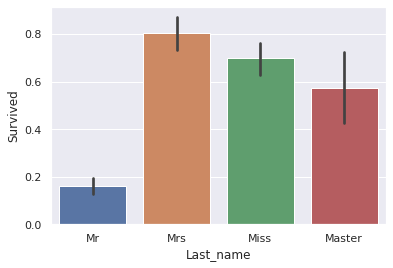

In [ ]:
Last_name_list = [Last_name.split(',')[1].split('.')[0].replace(' ', '') for Last_name in titanic_df['Name']] 
# Title_list에 name을 split해서 title을 받아온 후 , 저장 
titanic_df['Last_name']=Last_name_list
# Title 컬럼 추가

titanic_df.loc[(titanic_df['Sex']=='female') & ((titanic_df['Last_name']!='Mrs') & (titanic_df['Last_name']!='Miss')), 'Last_name'] = 'Mrs'
titanic_df.loc[(titanic_df['Sex']=='male') & ((titanic_df['Last_name']!='Mr') & (titanic_df['Last_name']!='Master')), 'Last_name'] = 'Mr'
# 호칭이 Mr, Master, Mrs, Miss 가 아닌 것 중에 성별을 확인하여 female이면 Mrs, male이면 Mr로 변경 
titanic_df.head()

sns.barplot(x = 'Last_name' , y = 'Survived',data = titanic_df)

## 3.3클래스에 탄 사람이 많이 죽었다.
  - 팩트) 저렴하기 때문에 <시각화 체크>
    - 가설) 위치가 좋지 않을 것이다. <모델링 필요>

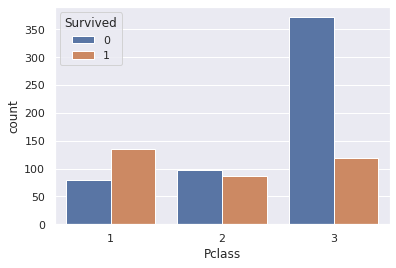

In [ ]:
# 좌석 클래스에 따른 생존 비율
sns.countplot(data=titanic_df, x='Pclass', hue='Survived')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


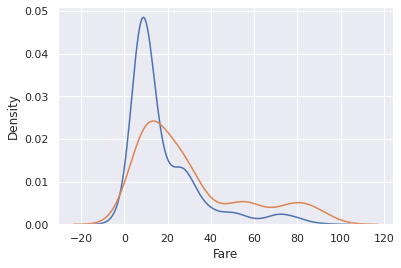

In [ ]:
# 저렴하기 떄문에 시각화
perish = low_fare[low_fare['Survived'] == 0 ]
survived = low_fare[low_fare['Survived'] == 1]

sns.distplot(perish['Fare'], hist=False, label='Perish')
sns.distplot(survived['Fare'], hist=False, label='Survived')

In [ ]:
pd.crosstab([titanic_df['Pclass'],titanic_df['Last_name']=='Mr'],
            [titanic_df['Embarked'],titanic_df['Survived']],
            margins=True).style.background_gradient(cmap='Reds')

## 4.S에서 탄 사람이 많이 죽었다 

  - 팩트) S에서 탄 사람이 많이 죽었다. <시각화> <체크>
    - 가설) S는 어떤동내일까? 가난한 사람이 많은 동내일까? <시각화필요> 
    - 가설) 가족이 없는 사람일까? <시각화필요>

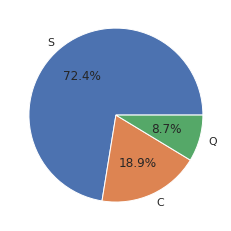

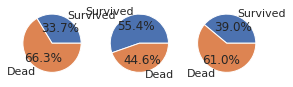

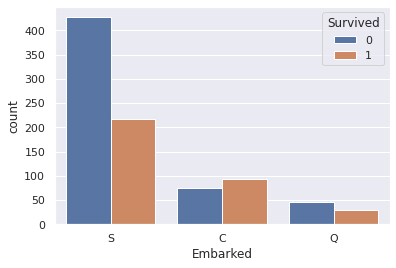

In [ ]:
# 탑승한 선착장 위치에 따른 생존 비율
pie_chart('Embarked')
sns.countplot(data=train, x='Embarked', hue='Survived')

## 5.가족 수에 따른 영향이 있을 것이다.
  - 가족이 없으면 많이 죽었다.

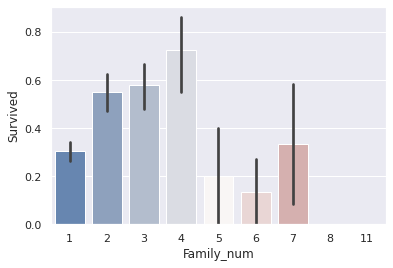

In [ ]:
titanic_df['Family_num'] = titanic_df['SibSp'] + titanic_df['Parch']+1
sns.barplot(x="Family_num", y="Survived", data = titanic_df, palette="vlag")
plt.show()

In [ ]:
pd.crosstab([titanic_df['Pclass'],titanic_df['Last_name']=='Mr'],
            [titanic_df['Embarked'],titanic_df['Survived']],
            margins=True).style.background_gradient(cmap='Reds')

#

In [ ]:
pd.crosstab([titanic_df['Sex'],titanic_df['Survived'],titanic_df['Embarked']],
            titanic_df['Family_num'],
            margins=True).style.background_gradient(cmap='Blues')

## 5.나이와 요금간 상관관계

 - 요금을 적게낸 사람일 수록 죽었다.
 - 어릴수록 더 많이 죽었다.

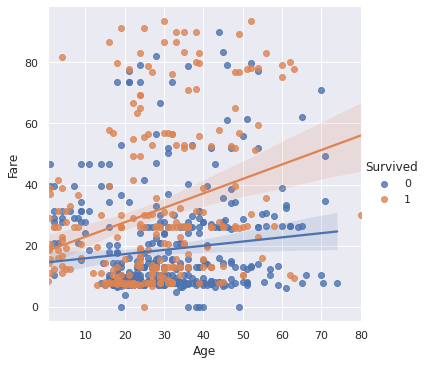

In [ ]:
low_fare = train[train['Fare'] < 100]


sns.lmplot(data = low_fare, x='Age', y='Fare', hue='Survived')

## ======데이터 전처리=========


In [ ]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Last_name    891 non-null    object 
 13  Family_num   891 non-null    int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 97.6+ KB


total data : 891개


features 사용 컬럼 : Survived, Pclass, Sex(파이프라인) , Age(결측치, 구간정렬), SibSp,Patch, Fare(파이프라인) , Embarked(파이프라인) , Last_name(파이프라인),Familly_nun


파이프 라인 필요한 컬럼 : Sex, Age, Fare, Embarked, Last_name, Failmy_num


## 1.데이터 불러오기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv('/content/sample_data/train.csv', sep=',')
test = pd.read_csv('/content/sample_data/test.csv', sep=',')
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


## 2.Test data에 결측치 처리

In [ ]:
#test에 Fare 결측치가 존재하여 결측치 처리함
test.loc[test["Fare"].isnull(), "Fare"] = 0
test[test["Fare"].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


## 3.Embarked(범주형)변수 전처리 

In [ ]:

train["Embarked_C"] = train["Embarked"] == "C"
train["Embarked_S"] = train["Embarked"] == "S"
train["Embarked_Q"] = train["Embarked"] == "Q"

print(train.shape)
train[["Embarked", "Embarked_C", "Embarked_S", "Embarked_Q"]].head()

test["Embarked_C"] = test["Embarked"] == "C"
test["Embarked_S"] = test["Embarked"] == "S"
test["Embarked_Q"] = test["Embarked"] == "Q"

print(test.shape)
test[["Embarked", "Embarked_C", "Embarked_S", "Embarked_Q"]].head()

(891, 15)
(418, 14)


,Embarked,Embarked_C,Embarked_S,Embarked_Q
0,Q,False,False,True
1,S,False,True,False
2,Q,False,False,True
3,S,False,True,False
4,S,False,True,False


## 4.가족 규모 전처리

In [ ]:
# 가족 사이즈 추가 (train + test)
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1 # 가족 추가
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1 # 가족 추가


test["HighFare"] = (test["Fare"] >= 30)

## 5.티켓요금 구간별 전처리

In [ ]:
# 티켓 요금 범주설정 (train + test)
low_fare = train["Fare"] < 15
medium_fare = (train["Fare"] >= 15) & (train["Fare"] < 30 )
high_fare = train["Fare"] >= 30
low_fare = test["Fare"] < 15
medium_fare = (test["Fare"] >= 15) & (test["Fare"] < 30 )
high_fare = test["Fare"] >= 30


# 요금에 대한 구간별 원핫 인코딩
train["LowFare"] = train["Fare"] < 15
train["MediumFare"] = (train["Fare"] >= 15) & (train["Fare"] < 30)
train["HighFare"] = (train["Fare"] >= 30)

test["LowFare"] = test["Fare"] < 15
test["MediumFare"] = (test["Fare"] >= 15) & (test["Fare"] < 30)

## 6.성인남자(범주형) 전처리

In [ ]:
Last_name_list = [Last_name.split(',')[1].split('.')[0].replace(' ', '') for Last_name in train['Name']] 
# Title_list에 name을 split해서 title을 받아온 후 , 저장

train['Last_name']=Last_name_list

train.loc[(train['Sex']=='female') & ((train['Last_name']!='Mrs') & (train['Last_name']!='Miss')), 'Last_name'] = 'Mrs'
train.loc[(train['Sex']=='male') & ((train['Last_name']!='Mr') & (train['Last_name']!='Master')), 'Last_name'] = 'Mr'
# 호칭이 Mr, Master, Mrs, Miss 가 아닌 것 중에 성별을 확인하여 female이면 Mrs, male이면 Mr로 변경 

Last_name_list = [Last_name.split(',')[1].split('.')[0].replace(' ', '') for Last_name in test['Name']] 
test['Last_name']=Last_name_list

test.loc[(test['Sex']=='female') & ((test['Last_name']!='Mrs') & (test['Last_name']!='Miss')), 'Last_name'] = 'Mrs'
test.loc[(test['Sex']=='male') & ((test['Last_name']!='Mr') & (test['Last_name']!='Master')), 'Last_name'] = 'Mr'


train.tail()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_S,Embarked_Q,FamilySize,LowFare,MediumFare,HighFare,Last_name
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,False,True,False,1,True,False,False,Mr
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,False,True,False,1,False,False,True,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,False,True,False,4,False,True,False,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,True,False,False,1,False,False,True,Mr
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,False,False,True,1,True,False,False,Mr


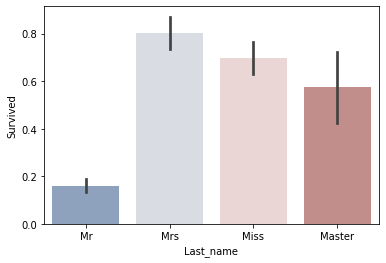

In [ ]:
sns.barplot(x="Last_name", y="Survived", data = train, palette="vlag")
plt.show()

## 7.Age Null 값 채우기 및 전처리

In [ ]:
# Mr의 평균 나이(Nan값 제외)
mr_age = train.loc[train['Last_name']=='Mr', 'Age']
mr_avg = int(round(mr_age.mean() ,1))

# Master의 평균 나이(Nan값 제외)
master_age = train.loc[train['Last_name']=='Master', 'Age']
master_avg = int(round(master_age.mean() ,1))

# Mrs의 평균 나이(Nan값 제외)
mrs_age = train.loc[train['Last_name']=='Mrs', 'Age']
mrs_avg = int(round(mrs_age   .mean() ,1))

# Miss의 평균 나이(Nan값 제외)
miss_age = train.loc[train['Last_name']=='Miss', 'Age']
miss_avg = int(round(miss_age.mean() ,1))
        
mr_avg, master_avg, mrs_avg, miss_avg




(33, 4, 35, 21)

In [ ]:
#Last_name 처리하기
train["Name_Mr"] = train["Last_name"] == "Mr"
train["Name_Master"] = train["Last_name"] == "Master"
train["Name_Mrs"] = train["Last_name"] == "Mrs"
train["Name_Miss"] = train["Last_name"] == "Miss"

print(train.shape)
train[["Last_name", "Name_Mr", "Name_Master", "Name_Mrs","Name_Miss"]].head()


test["Name_Mr"] = test["Last_name"] == "Mr"
test["Name_Master"] = test["Last_name"] == "Master"
test["Name_Mrs"] = test["Last_name"] == "Mrs"
test["Name_Miss"] = test["Last_name"] == "Miss"

print(test.shape)
test[["Last_name", "Name_Mr", "Name_Master", "Name_Mrs","Name_Miss"]].head()

(891, 24)
(418, 23)


,Last_name,Name_Mr,Name_Master,Name_Mrs,Name_Miss
0,Mr,True,False,False,False
1,Mrs,False,False,True,False
2,Mr,True,False,False,False
3,Mr,True,False,False,False
4,Mrs,False,False,True,False


In [ ]:
# 나이 결측값 처리
new_age = []

for age, Last_name in zip(train['Age'], train['Last_name']) :
  if np.isnan(age) == True :
    if Last_name  == 'Mr' :
      new_age.append(mr_avg)
    elif Last_name == 'Master' : 
      new_age.append(master_avg)
    elif Last_name == 'Mrs' :
      new_age.append(mrs_avg)
    elif Last_name == 'Miss' :
      new_age.append(miss_avg)
  else :
    new_age.append(age)

train['New_age'] = new_age
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_S,Embarked_Q,FamilySize,LowFare,MediumFare,HighFare,Last_name,Name_Mr,Name_Master,Name_Mrs,Name_Miss,New_age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,True,False,2,True,False,False,Mr,True,False,False,False,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True,False,False,2,False,False,True,Mrs,False,False,True,False,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,1,True,False,False,Miss,False,False,False,True,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,True,False,2,False,False,True,Mrs,False,False,True,False,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,True,False,1,True,False,False,Mr,True,False,False,False,35.0


In [ ]:
new_age = []
for age, Last_name in zip(test['Age'], test['Last_name']) :
  if np.isnan(age) == True :
    if Last_name  == 'Mr' :
      new_age.append(mr_avg)
    elif Last_name == 'Master' : 
      new_age.append(master_avg)
    elif Last_name == 'Mrs' :
      new_age.append(mrs_avg)
    elif Last_name == 'Miss' :
      new_age.append(miss_avg)
  else :
    new_age.append(age)

test['New_age'] = new_age
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_S,Embarked_Q,FamilySize,HighFare,LowFare,MediumFare,Last_name,Name_Mr,Name_Master,Name_Mrs,Name_Miss,New_age
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,False,False,True,1,False,True,False,Mr,True,False,False,False,34.5
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,False,True,False,2,False,True,False,Mrs,False,False,True,False,47.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,False,False,True,1,False,True,False,Mr,True,False,False,False,62.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,False,True,False,1,False,True,False,Mr,True,False,False,False,27.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,False,True,False,3,False,True,False,Mrs,False,False,True,False,22.0


## 8.성별 문자열 변수 숫자형으로 변경

In [ ]:
# sex 컬럼 문자열에서 숫자형으로 바꿔줌
train.loc[train["Sex"] == "male", "Sex"] = 0
train.loc[train["Sex"] == "female", "Sex"] = 1

test.loc[test["Sex"] == "male", "Sex"] = 0
test.loc[test["Sex"] == "female", "Sex"] = 1


In [ ]:
train['Sex'] = pd.to_numeric(train['Sex'])
test['Sex'] = pd.to_numeric(test['Sex'])

In [ ]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Embarked_C   891 non-null    bool   
 13  Embarked_S   891 non-null    bool   
 14  Embarked_Q   891 non-null    bool   
 15  FamilySize   891 non-null    int64  
 16  LowFare      891 non-null    bool   
 17  MediumFare   891 non-null    bool   
 18  HighFare     891 non-null    bool   
 19  Last_nam

## 9.파이프 라인 (XX)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

num_pipeline = Pipeline([
                         ('imputer', SimpleImputer(strategy="median")), # 중간값
                         ("std_scaler", StandardScaler()) # 표준편차
])

train_tr = num_pipeline.fit_transform(train)


from sklearn.compose import ColumnTransformer #각열마다 다른 변환기를 적용할 수 있음

num_attribs = list(train)
cat_attribs = ['Embarked','Last_name']

full_pipeline = ColumnTransformer([
                                   ("num", num_pipeline, num_attribs),    # 파이프 라인
                                   ("cat", OneHotEncoder(), cat_attribs), # 원핫 인코딩
])

train_prepared = full_pipeline.fit_transform(train)
train_prepared[:3]

NameError: ignored

## ========training========

## 1.채택된 변수 설정

In [ ]:
# feature에 사용할 컬럼만 저장 
features = ["Pclass", "Sex", "Fare", 
"Embarked_C", "Embarked_S", "Embarked_Q", 
"LowFare", "MediumFare", "HighFare", 
"FamilySize",'SibSp','Parch',
"Name_Mr", "Name_Master", "Name_Mrs","Name_Miss"
]

features

['Pclass',
 'Sex',
 'Fare',
 'Embarked_C',
 'Embarked_S',
 'Embarked_Q',
 'LowFare',
 'MediumFare',
 'HighFare',
 'FamilySize',
 'SibSp',
 'Parch',
 'Name_Mr',
 'Name_Master',
 'Name_Mrs',
 'Name_Miss']

In [ ]:
#
X_train = train[features]

print(X_train.shape)
X_train.head()

(891, 16)


,Pclass,Sex,Fare,Embarked_C,Embarked_S,Embarked_Q,LowFare,MediumFare,HighFare,FamilySize,SibSp,Parch,Name_Mr,Name_Master,Name_Mrs,Name_Miss
0,3,0,7.2500,False,True,False,True,False,False,2,1,0,True,False,False,False
1,1,1,71.2833,True,False,False,False,False,True,2,1,0,False,False,True,False
2,3,1,7.9250,False,True,False,True,False,False,1,0,0,False,False,False,True
3,1,1,53.1000,False,True,False,False,False,True,2,1,0,False,False,True,False
4,3,0,8.0500,False,True,False,True,False,False,1,0,0,True,False,False,False


In [ ]:
X_test = test[features]

print(X_test.shape)
X_test.head()

(418, 16)


,Pclass,Sex,Fare,Embarked_C,Embarked_S,Embarked_Q,LowFare,MediumFare,HighFare,FamilySize,SibSp,Parch,Name_Mr,Name_Master,Name_Mrs,Name_Miss
0,3,0,7.8292,False,False,True,True,False,False,1,0,0,True,False,False,False
1,3,1,7.0000,False,True,False,True,False,False,2,1,0,False,False,True,False
2,2,0,9.6875,False,False,True,True,False,False,1,0,0,True,False,False,False
3,3,0,8.6625,False,True,False,True,False,False,1,0,0,True,False,False,False
4,3,1,12.2875,False,True,False,True,False,False,3,1,1,False,False,True,False


In [ ]:
label_name = "Survived"

# train dataframe의 Survived 컬럼를 가져옵니다.
y_train = train[label_name]

print(y_train.shape)
y_train.head()

(891,)


0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [ ]:
full_train_data = X_train.copy()
full_train_label = y_train.copy()
full_test_data   = X_test.copy()
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(full_train_data, full_train_label, random_state=0)

## 2.그리드 탐색 estimators & 변수 갯수 선택

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
param_grid = [
              {"n_estimators": [50, 100, 200, 300], "max_features":[8,10,16]}, #선택하는 특성의 갯수
              {'bootstrap': [False], 'n_estimators': [100,150], 'max_features': [10,16]}

]

forest_reg = RandomForestRegressor() #테스트할 모델

grid_search = GridSearchCV(forest_reg, #랜덤포레스트리그레서의 클래스 객체
                           param_grid, # 설정한 하이퍼 파라미터들 
                           cv=5, # 크로스 벨리데이션 횟수
                           scoring=None,
                           return_train_score=True)

grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
grid_search.best_params_

{'max_features': 16, 'n_estimators': 200}

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=16, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
res = grid_search.cv_results_

for mean_score, params in zip(res['mean_test_score'], res["params"]):
    print(mean_score.mean(), params)

0.3587143561144842 {'max_features': 8, 'n_estimators': 50}
0.36068465322499277 {'max_features': 8, 'n_estimators': 100}
0.3650104154874632 {'max_features': 8, 'n_estimators': 200}
0.36332179500068545 {'max_features': 8, 'n_estimators': 300}
0.36377453529033826 {'max_features': 10, 'n_estimators': 50}
0.3654010005011631 {'max_features': 10, 'n_estimators': 100}
0.36395413325793646 {'max_features': 10, 'n_estimators': 200}
0.37284033336494726 {'max_features': 10, 'n_estimators': 300}
0.3679929041888281 {'max_features': 16, 'n_estimators': 50}
0.3697425579961721 {'max_features': 16, 'n_estimators': 100}
0.37480178839042644 {'max_features': 16, 'n_estimators': 200}
0.36948517226412936 {'max_features': 16, 'n_estimators': 300}
0.26542894950216367 {'bootstrap': False, 'max_features': 10, 'n_estimators': 100}
0.26882299935315057 {'bootstrap': False, 'max_features': 10, 'n_estimators': 150}
0.2448320200273577 {'bootstrap': False, 'max_features': 16, 'n_estimators': 100}
0.24370696656040533 {'b

## 3.랜덤포레스트로 확률보기

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=200, random_state=42)
forest.fit(X_train, y_train)


print("Training score : {:.3f}".format(forest.score(X_train, y_train)))
print("Test score : {:.3f}".format(forest.score(X_test, y_test)))

Training score : 0.925
Test score : 0.857
